# The Equation of Time

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/russellgoyder/sundial/HEAD?labpath=docs%2Fnb%2Fequation_of_time.ipynb)

The "Equation of Time" refers to the observed difference between a given time, say noon UTC, and the time at which the sun is directly overhead. This phenomenon is due to two effects; the tilt of the Earth's axis $\alpha$, and the elliptical nature of the Earth's orbit around the sun owing to a non-zero eccentricity $e$.

For a more detailed look at the properties of Earth's orbit, see [Orbit Analysis](orbit_analysis.md).

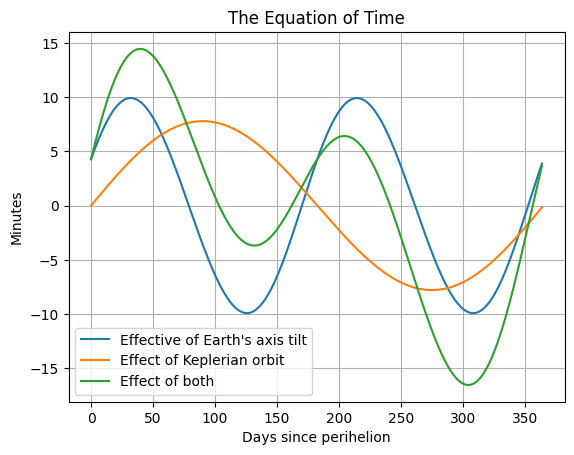

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from analemma import orbit, geometry

earth = orbit.PlanetParameters.earth()

t = earth.daily_noons()
psi = earth.rotation_angle(t)

pi = np.pi

# hour angle with circular orbit (zero eccentricity, linear in t)
sigma_alpha_only = np.mod(pi + earth.rho + earth.om_y*t, 2*pi)
mu_alpha_only = np.mod(geometry.hour_angle(earth.alpha, sigma_alpha_only, psi), 2*pi)

# hour angle with zero planetary rotation axis tilt
sigma_eot = np.mod(pi + earth.rho + orbit.orbital_angle(orbit.spinor_time(t)), 2*pi)
mu_e_only = np.mod(geometry.hour_angle(0.0, sigma_eot, psi), 2*pi)

# hour angle with non-zero eccentricity and axis tilt
mu_eot = np.mod(geometry.hour_angle(earth.alpha, sigma_eot, psi), 2*pi)

def s2d(seconds):
    "Convert seconds to days"
    return seconds / 24 / 3600

def r2d(radians):
    "Convert radians to degrees"
    return radians / pi * 180

fig, ax = plt.subplots()
# 1 degree is 4 minutes if 360 degrees is 24 hours
ax.plot(s2d(t), 4*r2d(pi - mu_alpha_only), label="Effective of Earth's axis tilt")
ax.plot(s2d(t), 4*r2d(pi - mu_e_only), label="Effect of Keplerian orbit")
ax.plot(s2d(t), 4*r2d(pi - mu_eot), label="Effect of both")
ax.grid()
ax.legend()
ax.set_xlabel("Days since perihelion")
ax.set_ylabel("Minutes")
_ = ax.set_title("The Equation of Time")
